https://cienciadedatos.net/documentos/py19-pca-python

## Explanatory factor analysis

Supuestos:

* Features are metric
* Features are continuous or ordinal
* there's r>0.3 correlation between the features in your dataset
* have > 100 observations and >5 observations per feature
* Sample is homogenous

PCA is employed to **improve clustering results** by reducing the dimensionality of the data and reducing the impact of noise in the dataset. It achieves this by transforming the original features into a set of linearly uncorrelated variables called principal components.

Disminuye la dimensionalidad

El algoritmo captura la mayor varianza de cada variable para proyectarla en un plano, para varias variables tienen que ser ortogonales (no correlacionadas). 

### Escalado de las variables 
Debido a que la varianza de una variable se mide en sus mismas unidades elevadas al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media cero y desviación estándar de uno, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos. 
### Influencia de outliers

Al trabajar con varianzas, el método PCA es muy sensible a outliers, por lo que es recomendable estudiar si los hay. La detección de valores atípicos con respecto a una determinada dimensión es algo relativamente sencillo de hacer mediante comprobaciones gráficas. Sin embargo, cuando se trata con múltiples dimensiones el proceso se complica. Por ejemplo, considérese un hombre que mide 2 metros y pesa 50 kg. Ninguno de los dos valores es atípico de forma individual, pero en conjunto se trataría de un caso muy excepcional. 

## Ejemplo de cienciadedatos.net

In [11]:
import statsmodels.api as sm

USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data

## Exploración inicial

Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

import pylab as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import datasets

In [13]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------
-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [14]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

la varianza de assault es muy grande y eso generará problemas pues si no se escala, tomará assault como la variable que más explica los datos.

In [20]:
## ¿Que es un pipeline? Básicamente es agrupar una serie de transformaciones secuenciales para aplicarlas a un dataframe. Más info en
# https://cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn#Pipeline-y-ColumnTransformer

from sklearn.pipeline import Pipeline

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']



In [22]:


# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)



,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,-0.418181,-0.187986,0.872806,0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,-0.649228,0.743407,-0.133878,-0.089024


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


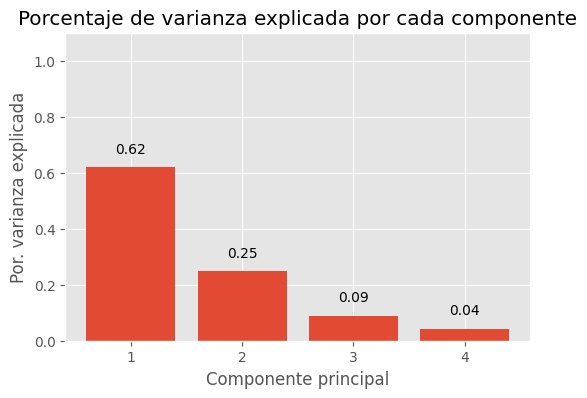

In [23]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


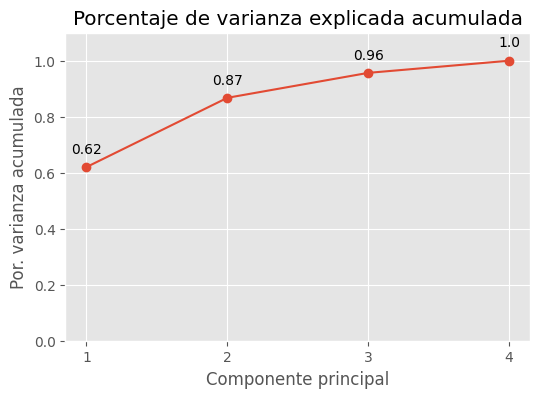

In [24]:


# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');



In [27]:


# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()



,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

### Factor analysis on iris dataset

We're going to be using the built-in iris dataset from scikit-learn, so that's all set up for you. Our variable X is going to be iris data, and then we also have the variable names which we take from the built-in dataset.

In [2]:
iris =  datasets.load_iris()

X = iris.data

variable_names = iris.feature_names

In [3]:
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Factor loadings: the output of factor analysis

Loadings near to -1 or 1 = factor has strong influence on the variable
Loadings close to 0 = weak influence
> 1 means highly correlated

In [4]:
factor = FactorAnalysis().fit(X)

df = pd.DataFrame(factor.components_, columns=variable_names)
print(df)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


## Principal component analysis (PCA)

In [6]:
pca = decomposition.PCA()
iris_pca =pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [7]:
pca.explained_variance_ratio_.sum()

np.float64(1.0000000000000002)

In [8]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,0.315487,-0.319723,-0.479839,0.753657


<Axes: >

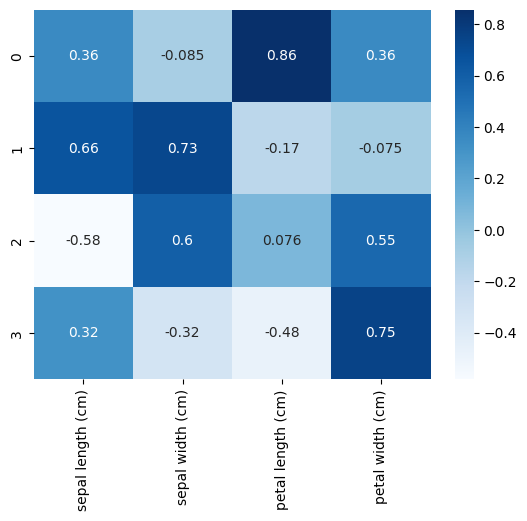

In [9]:
sns.heatmap(comps, cmap='Blues', annot=True)